# Opportunities for Big Mountain

Big Mountain Resort is the flagship ski resort of Montana.  You have developed the north side.  You have opened up the Hellroaring bowls and chutes.  Here we can take a look at the features and facilities of Big Mountain as it stacks up against other Montana ski mountains.  


In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


,124
Name,Big Mountain Resort
state,Montana
vertical_drop,2353
fastQuads,3
total_chairs,14
Runs,105
TerrainParks,4
LongestRun_mi,3.3
SkiableTerrain_ac,3000
Snow Making_ac,600


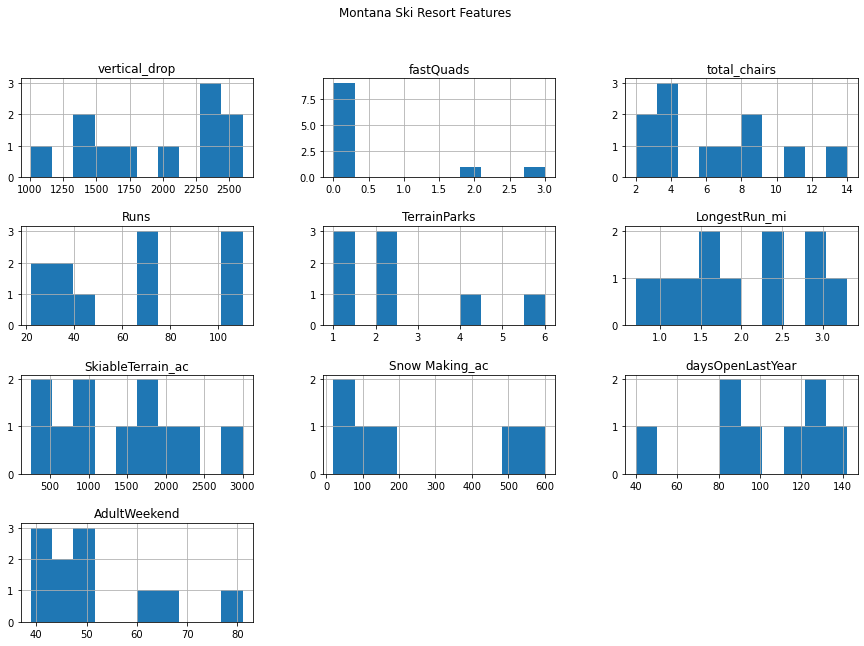

In [28]:
ski_data = pd.read_csv('../data/ski_data_cleaned.csv')
factors = [feat for feat in ski_data.columns if feat in \
           ['Name','state','vertical_drop','Runs','fastQuads','total_chairs','TerrainParks','LongestRun_mi','SkiableTerrain_ac','Snow Making_ac','daysOpenLastYear','total_chairs_run_ratio','fastQuads_runs_ratio','AdultWeekend']]
focus_data = ski_data[factors]
Montana = focus_data[focus_data.state=="Montana"]
Montana.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.suptitle("Montana Ski Resort Features")
focus_data[focus_data.Name=="Big Mountain Resort"].T


As you can see, Big Mountain is at or near the top of Montana in all of these categories, and it is reflected in the ticket price.


In fact, Big Mountain Resort competes well on features with the entire market segment of big western ski mountains.  The only place where it lags behind significantly is when you compare its ticket price to ski resorts in Colorado and Utah.  


In [33]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8), data=ski_data):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        x = np.array(data[col]).reshape((-1, 1))
        y = np.array(data['AdultWeekend'])
        try:
            mask = np.isnan(x)
            x[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), x[~mask])
        except TypeError:
            print("%s is a non-numeric type." % col)

        ax.scatter(x = col, y = 'AdultWeekend', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
        
        try:
            # Initialize and train a regression model
            model =LinearRegression().fit(x, y)
            r_sq = model.score(x, y)
            # Predict
            y_predicted = model.predict(x)
            ax.plot(np.array(data[col]).reshape((-1,1)), y_predicted, color='r', linewidth=r_sq*4)
        except ValueError:
            print ("Could not run a linear regression on %s" % col)
                       
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)


<ipython-input-35-9574982bb2a6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BigWest  = focus_data[focus_data.state.isin(['Montana','South Dakota','Wyoming','Idaho','Washington','Oregon','New Mexico'])]\


                                   Name       state
36                          Bogus Basin       Idaho
37             Brundage Mountain Resort       Idaho
41                Pebble Creek Ski Area       Idaho
42                           Schweitzer       Idaho
43                      Silver Mountain       Idaho
44            Soldier Mountain Ski Area       Idaho
45                      Tamarack Resort       Idaho
115                        Bridger Bowl     Montana
116                  Discovery Ski Area     Montana
117                        Great Divide     Montana
118             Lost Trail - Powder Mtn     Montana
121                  Red Lodge Mountain     Montana
124                 Big Mountain Resort     Montana
152                     Taos Ski Valley  New Mexico
197       Anthony Lakes Mountain Resort      Oregon
201                        Mt. Bachelor      Oregon
246                    49 Degrees North  Washington
248                    Crystal Mountain  Washington
250  Mt. Spo

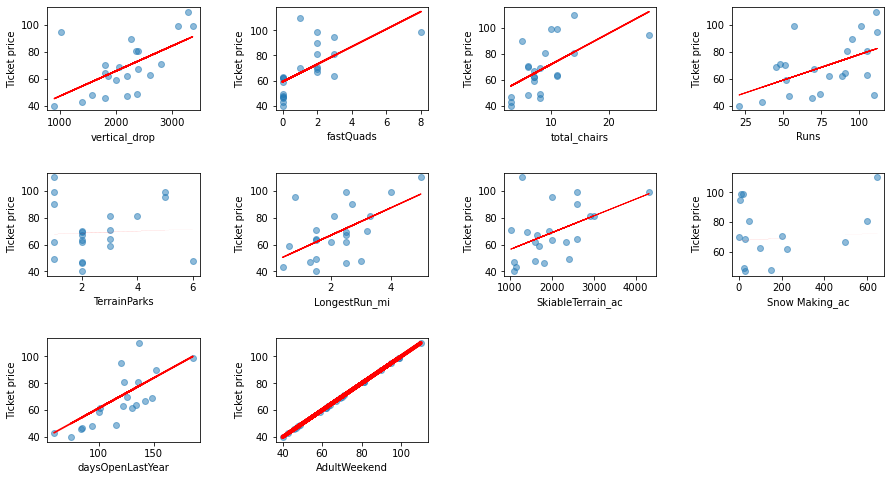

In [35]:
BigWest  = focus_data[focus_data.state.isin(['Montana','South Dakota','Wyoming','Idaho','Washington','Oregon','New Mexico'])]\
                    [focus_data.SkiableTerrain_ac > 1000]
scatterplots(factors[2:], ncol=4, figsize=(15, 8), data=BigWest)

<ipython-input-38-e2c394cf97c6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AllWest = pd.concat([focus_data[focus_data.state.isin(['Colorado','Utah','California','Nevada'])][focus_data.SkiableTerrain_ac > 1000], BigWest])


Name is a non-numeric type.
Could not run a linear regression on Name
state is a non-numeric type.
Could not run a linear regression on state


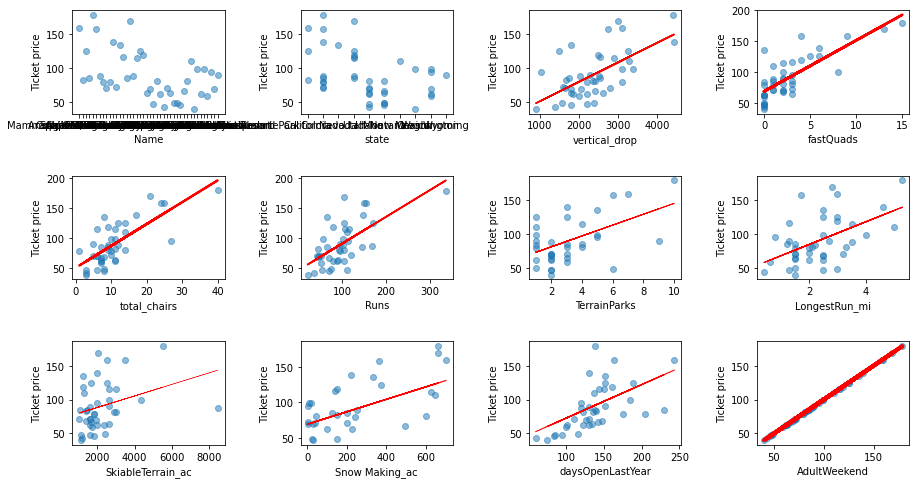

In [38]:
AllWest = pd.concat([focus_data[focus_data.state.isin(['Colorado','Utah','California','Nevada'])][focus_data.SkiableTerrain_ac > 1000], BigWest])
scatterplots(factors, ncol=4, figsize=(15, 8), data=AllWest)

Here is the key to moving up into the ranks of the elite Western ski resorts.

As you can see, Colorado and Utah open up the fastQuads, terrain, snowmaking and vertical drop compared to the Western resorts in MOntana and the other big wide-open states.  Along with that comes higher ticket prices.

Big Mountain can't do anything significant with the vertical drop, but you can increase the fast quad chairs to give expert skiers a place they can stay all day in Hellroaring.

But first, we have more good news.  Big Mountain is already a bargain compared to other resorts.


In [39]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

NameError: name 'StandardScaler' is not defined